In [12]:
import numpy as np
import matplotlib.pyplot as plt
import access_spectrum as acs
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
def compare_sample(direcs,titles,models,labels,colours,slopescale=0.1,savename=None):
    plt.figure(1,figsize=(15,6))
    plt.figure(2,figsize=(15,6))
    for d in range(len(direcs)):
        plt.figure(1)
        plt.subplot(1,len(direcs),d+1)
        plt.ylim(0,1)
        plt.title(titles[d],fontsize=14)
        plt.figure(2)
        plt.subplot(1,len(direcs),d+1)
        plt.ylim(0,slopescale)
        plt.xlabel('eigenvectors',fontsize=14)
        if d==0:
            plt.figure(1)
            plt.ylabel('R2',fontsize=14)
            plt.yticks(fontsize=13)
            plt.figure(2)
            plt.ylabel('R2 slope',fontsize=14)
            plt.yticks(fontsize=13)
        if d!=0:
            plt.figure(1)
            plt.yticks([])
            plt.figure(2)
            plt.yticks([])
        c = 0
        for m in range(len(models)):
            model = acs.pklread('{0}/{1}'.format(direcs[d],models[m]))
            plt.xlim(-1,len(model.R2Array))
            # Find the number of eigenvectors at which R2 crosses R2noise
            slope = model.R2Array - np.roll(model.R2Array,1)
            crossvec = np.where(model.R2Array > model.R2noise)
            if crossvec[0] != []:
                crossvec = crossvec[0][0] - 1
                if crossvec < 0:
                    crossvec = 0
                plt.figure(1)
                plt.axvline(crossvec,0,model.R2Array[crossvec],color=colours[c],lw=2)
                plt.text(crossvec+0.03*len(model.R2Array),0.02,'{0}'.format(crossvec),
                         color=colours[c],weight='bold',fontsize=13)
                if crossvec > 0:
                    plt.figure(2)
                    plt.axvline(crossvec,color=colours[c],lw=3)
                    plt.plot(np.arange(1,len(model.R2Array),1),slope[1:],color=colours[c],lw=2,label=labels[m])
                    plt.axhline(np.median(slope[crossvec+1:]),color=colours[c],lw=3,ls='--')
            # Plot R2 curve
            plt.figure(1)
            plt.plot(model.R2Array,color=colours[c],lw=4,label=labels[m])
            plt.axhline(model.R2noise,color=colours[c],ls='--',lw=3)
            c+=1
        plt.figure(1)
        plt.xticks(np.linspace(0,len(model.R2Array),5,dtype=int)[:-1],fontsize=13)
        plt.figure(2)
        plt.xticks(np.linspace(0,len(model.R2Array),5,dtype=int)[:-1],fontsize=13)
        if d==len(direcs)-1:
            plt.figure(1)
            legend = plt.legend(loc='best',fontsize=13)
            legend.get_frame().set_linewidth(0.0)
    plt.figure(1)
    plt.subplots_adjust(wspace=0)
    if savename:
        plt.savefig(savename)
    plt.figure(2)
    plt.subplots_adjust(wspace=0)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.



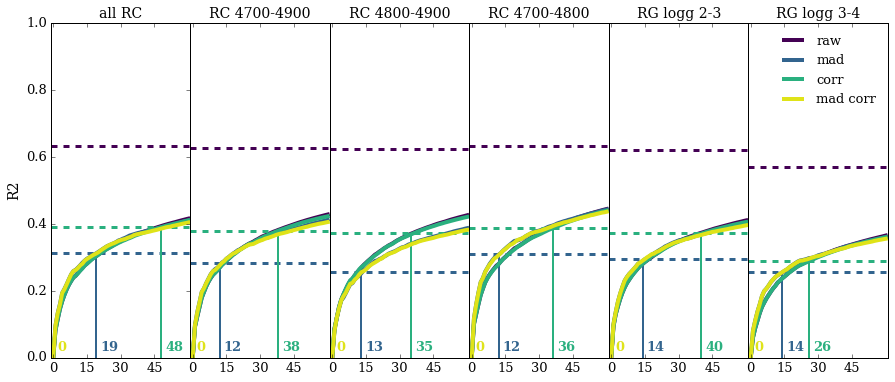

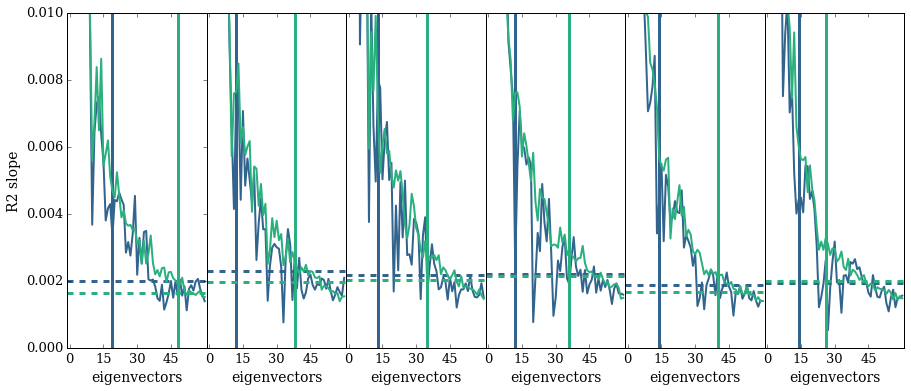

In [50]:
direcs = ['red_clump_12_TEFF_up6268.69189453_lo4130.89257812',
          'red_clump_12_TEFF_up4900.0_lo4700.0',
          'red_clump_12_TEFF_up4900.0_lo4800.0',
          'red_clump_12_TEFF_up4800.0_lo4700.0',
          #'red_giant_12_LOGG_up2.0_lo1.7',
          'red_giant_12_LOGG_up3.0_lo2.0',
          'red_giant_12_LOGG_up4.0_lo3.0']
titles = ['all RC',
          'RC 4700-4900',
          'RC 4800-4900',
          'RC 4700-4800',
          #'RG logg 1.7-2',
          'RG logg 2-3',
          'RG logg 3-4']
models = ['eig60_minSNR50_corrNone_madFalse.pkl',
          'eig60_minSNR50_corrNone_madTrue.pkl',
          'eig60_minSNR50_corr30px_madFalse.pkl',
          'eig60_minSNR50_corr30px_madTrue.pkl']
labels = ['raw','mad','corr','mad corr']
colours = plt.get_cmap('viridis')(np.linspace(0,0.95,len(models)))
compare_sample(direcs,titles,models,labels,colours,slopescale=0.01,savename='DR12_comparison.png')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.



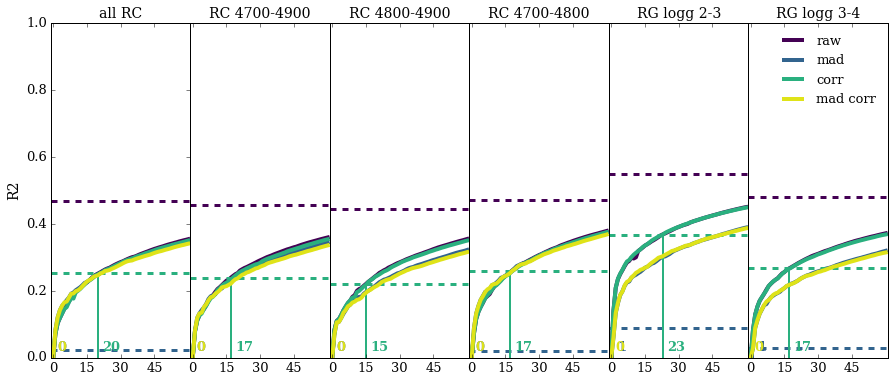

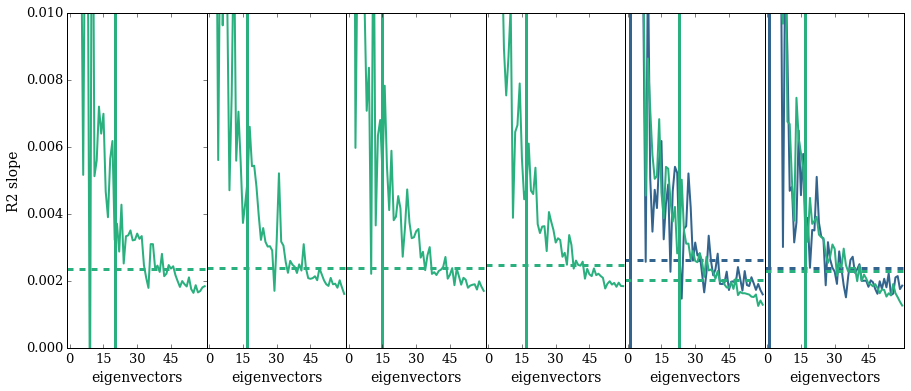

In [51]:
direcs = ['red_clump_13_TEFF_up6011.0_lo4134.5',
          'red_clump_13_TEFF_up4900.0_lo4700.0',
          'red_clump_13_TEFF_up4900.0_lo4800.0',
          'red_clump_13_TEFF_up4800.0_lo4700.0',
          #'red_giant_13_LOGG_up2.0_lo1.7',
          'red_giant_13_LOGG_up3.0_lo2.0',
          'red_giant_13_LOGG_up4.0_lo3.0']
compare_sample(direcs,titles,models,labels,colours,slopescale=0.01,savename='DR13_comparison.png')

IOError: [Errno 2] No such file or directory: 'red_clump_12_TEFF_up4900.0_lo4800.0/eig300_corrNone_madFalse.pkl'

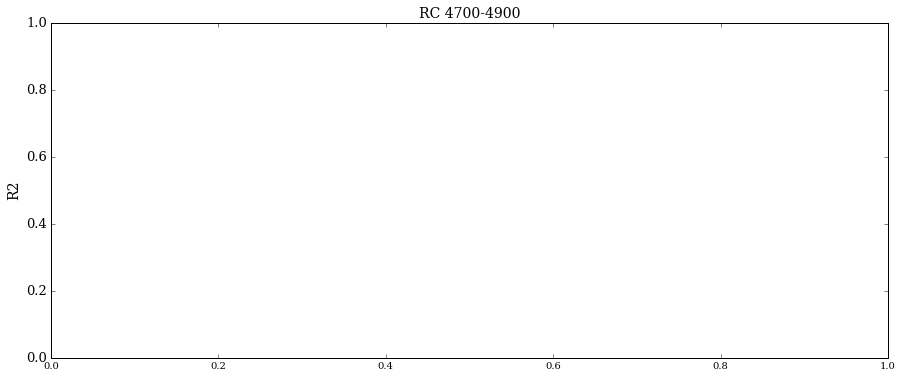

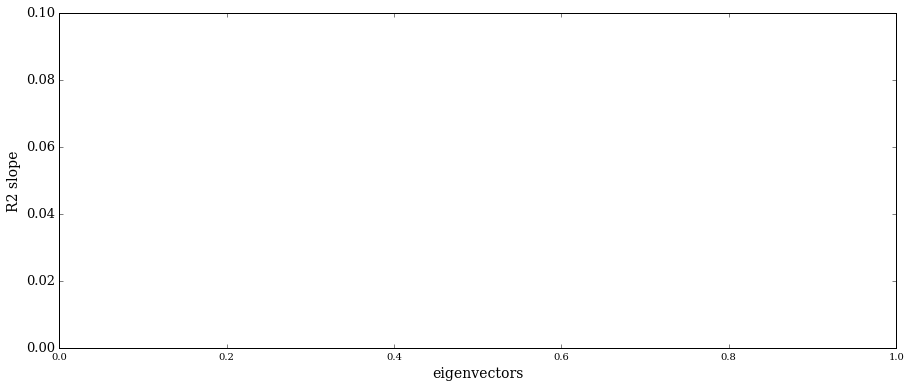

In [22]:
direcs = ['red_clump_12_TEFF_up4900.0_lo4800.0']
titles = ['RC 4800-4900']
models = ['eig300_corrNone_madFalse.pkl',
          'eig300_corrNone_madTrue.pkl',
          'eig300_corr30px_madFalse.pkl',
          'eig300_corr30px_madTrue.pkl']
labels = ['raw','mad','corr','mad corr']
colours = plt.get_cmap('viridis')(np.linspace(0,0.95,len(models)))
compare_sample(direcs,titles,models,labels,colours,slopescale=0.1)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.



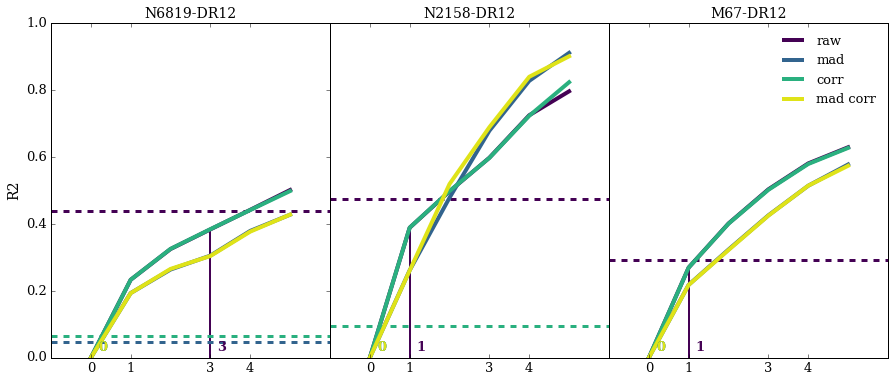

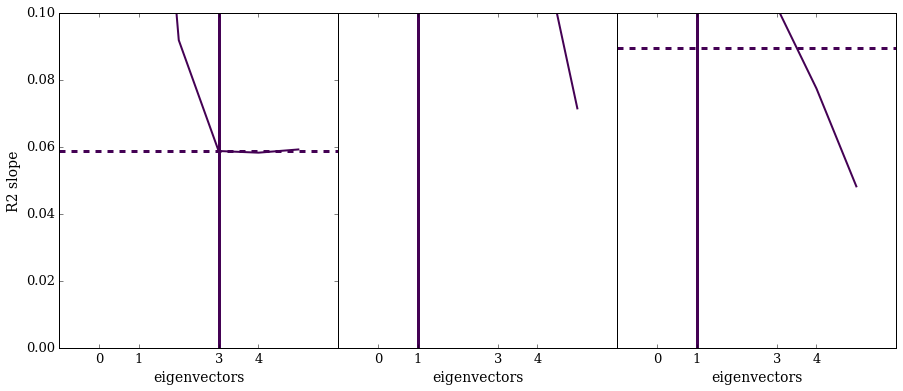

In [55]:
direcs = ['clusters_12_CLUSTER_matchN6819',
          #'clusters_13_CLUSTER_matchN6819',
          'clusters_12_CLUSTER_matchN2158',
          #'clusters_13_CLUSTER_matchN2158',
          'clusters_12_CLUSTER_matchM67']
          #'clusters_13_CLUSTER_matchM67']
titles = ['N6819-DR12',
          #'N6819-DR13',
          'N2158-DR12',
          #'N2158-DR13',
          'M67-DR12']
          #'M67-DR13']
models = ['corrNone_madFalse.pkl',
          'corrNone_madTrue.pkl',
          'corr30px_madFalse.pkl',
          'corr30px_madTrue.pkl']
labels = ['raw','mad','corr','mad corr']
colours = plt.get_cmap('viridis')(np.linspace(0,0.95,len(models)))
compare_sample(direcs,titles,models,labels,colours,slopescale=0.1,savename='DR12_oc_comparison.png')

In [23]:
from empca_residuals import *

In [25]:
rg = empca_residuals('apogee','red_giant',maskFilter,ask=True)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
Data key: done


Done getting filter information
Total 0 of 26920 stars missing


In [29]:
rc = empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
Data key: done


Done getting filter information
Total 0 of 19935 stars missing


In [38]:
def hist2d(x,y,bins=100):
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    Hmasked = np.ma.masked_where(H==0,H)
    plt.pcolormesh(xedges,yedges,Hmasked,
                   cmap = plt.get_cmap('plasma'),
                   vmin=0,vmax=100)
    plt.colorbar()

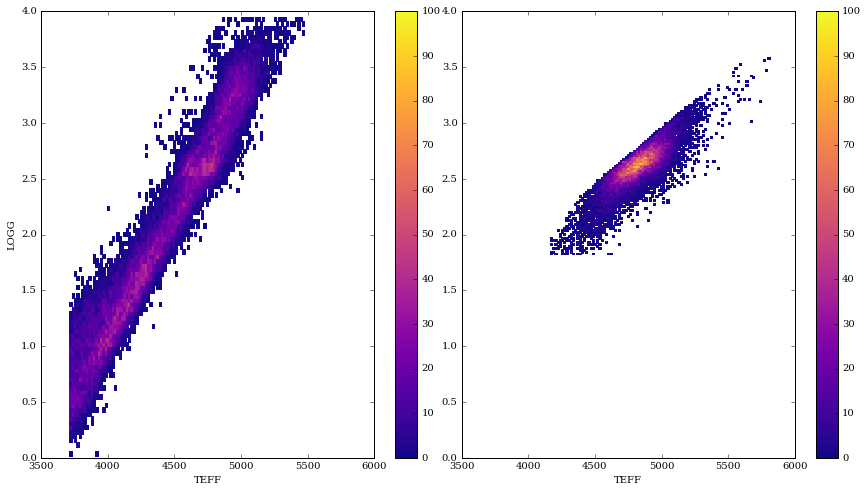

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(121)
hist2d(rg.teff,rg.logg)
plt.ylim(0,4)
plt.xlim(3500,6000)
plt.ylabel('LOGG')
plt.xlabel('TEFF')
plt.subplot(122)
hist2d(rc.teff,rc.logg)
plt.ylim(0,4)
plt.xlim(3500,6000)
plt.xlabel('TEFF')
plt.subplots_adjust(wspace=0.01)
plt.savefig('HRdiagram.png')

In [60]:
rc12= empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
Data key: done
Done getting filter information


In [61]:
rc13 = empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
Data key: done


Done getting filter information
Total 0 of 19289 stars missing


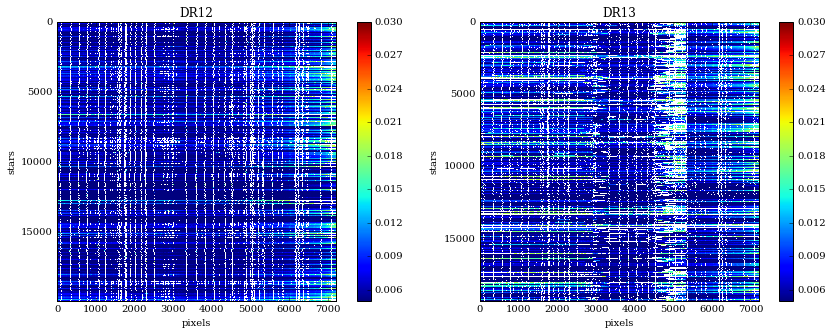

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(121)
rc12.imshow(rc12.spectra_errs,vmax=0.03)
plt.title('DR12')
plt.subplot(122)
rc13.imshow(rc13.spectra_errs,vmax=0.03)
plt.title('DR13')
plt.subplots_adjust(wspace=0.02)
plt.savefig('DR_err_comparison.png')

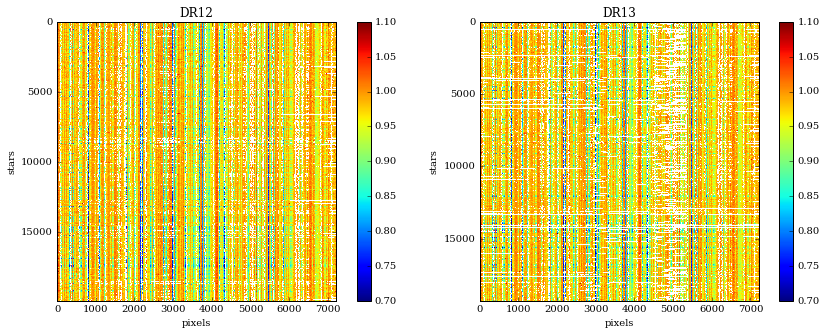

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(121)
rc12.imshow(rc12.spectra,vmin=0.7,vmax=1.1)
plt.title('DR12')
plt.subplot(122)
rc13.imshow(rc13.spectra,vmin=0.7,vmax=1.1)
plt.title('DR13')
plt.subplots_adjust(wspace=0.02)
plt.savefig('DR_spec_comparison.png')

In [75]:
rc12.findResiduals(gen=False)
rc13.findResiduals(gen=False)

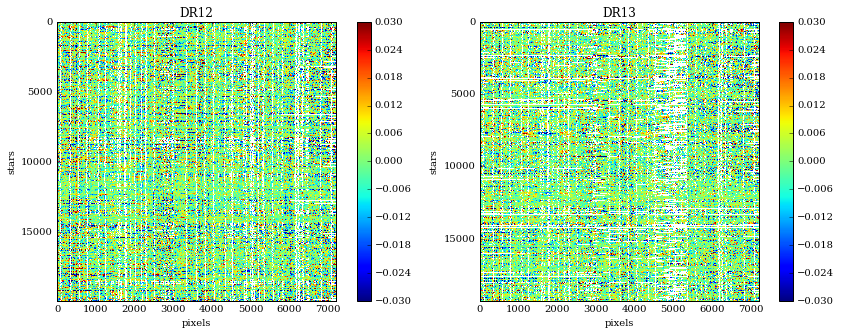

In [79]:
bound = 0.03
plt.figure(figsize=(15,5))
plt.subplot(121)
rc12.imshow(rc12.residuals,vmin=-bound,vmax=bound)
plt.title('DR12')
plt.subplot(122)
rc13.imshow(rc13.residuals,vmin=-bound,vmax=bound)
plt.title('DR13')
plt.subplots_adjust(wspace=0.02)
plt.savefig('DR_resid_comparison.png')